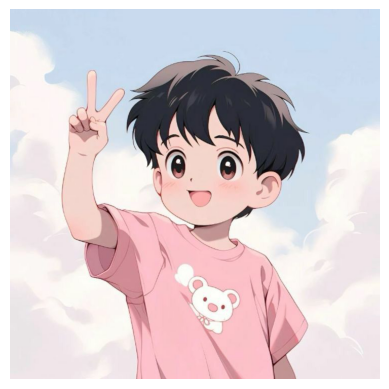

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('boy.jpeg')
rimage=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rimage)
plt.axis('off')
plt.show()

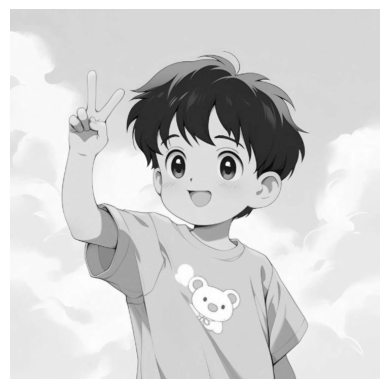

In [2]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.axis('off')  
plt.show()

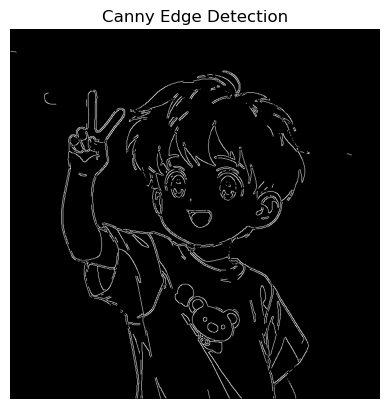

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_filter(image, kernel_size=5, sigma=1.0):
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    for x in range(kernel_size):
        for y in range(kernel_size):
            distance = (x - center)**2 + (y - center)**2
            kernel[x, y] = (1 / (2 * np.pi * sigma**2)) * np.exp(-distance / (2 * sigma**2))
    kernel /= np.sum(kernel)    
    return kernel

def sobel_filters(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    gradient_x = cv2.filter2D(image, cv2.CV_64F, sobel_x)
    gradient_y = cv2.filter2D(image, cv2.CV_64F, sobel_y)
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    direction = np.arctan2(gradient_y, gradient_x) 
    return magnitude, direction

def non_max_suppression(magnitude, direction):
    rows, cols = magnitude.shape
    suppressed = np.zeros((rows, cols), dtype=np.uint8)
    angle = np.rad2deg(direction) % 180  
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            q, r = 255, 255
            if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                q, r = magnitude[i, j + 1], magnitude[i, j - 1] 
            elif 22.5 <= angle[i, j] < 67.5:
                q, r = magnitude[i + 1, j - 1], magnitude[i - 1, j + 1] 
            elif 67.5 <= angle[i, j] < 112.5:
                q, r = magnitude[i + 1, j], magnitude[i - 1, j] 
            elif 112.5 <= angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]  
                
            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]
            else:
                suppressed[i, j] = 0

    return suppressed

def threshold(image, low=50, high=150):
    strong = np.uint8(255)
    weak = np.uint8(75)
    strong_edges = image >= high 
    weak_edges = (image >= low) & (image < high) 
    result = np.zeros_like(image, dtype=np.uint8)
    result[strong_edges] = strong
    result[weak_edges] = weak
    return result

def hysteresis(image, weak, strong=255):
    rows, cols = image.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if image[i, j] == weak:
                if ((image[i + 1, j - 1] == strong) or (image[i + 1, j] == strong) or
                        (image[i + 1, j + 1] == strong) or (image[i, j - 1] == strong) or
                        (image[i, j + 1] == strong) or
                        (image[i - 1, j - 1] == strong) or (image[i - 1, j] == strong) or
                        (image[i - 1, j + 1] == strong)):
                    image[i, j] = strong
                else:
                    image[i, j] = 0
    return image

def canny_edge_detection(image, low_threshold=50, high_threshold=150):
    kernel = gaussian_filter(image)
    blurred = cv2.filter2D(image, -1, kernel) 
    magnitude, direction = sobel_filters(blurred)
    suppressed = non_max_suppression(magnitude, direction)
    thresholded = threshold(suppressed, low=low_threshold, high=high_threshold)
    final_edges = hysteresis(thresholded, weak=75)
    return final_edges

image = cv2.imread('boy.jpeg', cv2.IMREAD_GRAYSCALE)
edges = canny_edge_detection(image, low_threshold=50, high_threshold=80)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')  
plt.show()

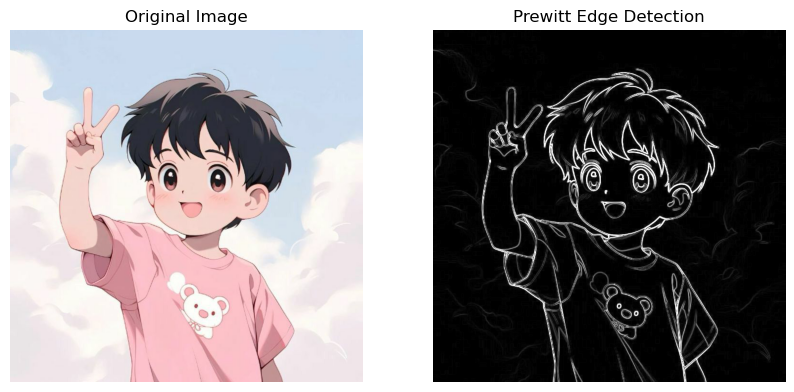

In [5]:
def prewitt_edge_detection(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.astype(float)
    
    prewitt_x = np.array([[-1, 0, 1],
                           [-1, 0, 1],
                           [-1, 0, 1]])
    
    prewitt_y = np.array([[-1, -1, -1],
                           [0, 0, 0],
                           [1, 1, 1]])
    
    edge_x = cv2.filter2D(img_gray, -1, prewitt_x)
    edge_y = cv2.filter2D(img_gray, -1, prewitt_y)
    
    edge_magnitude = np.sqrt(edge_x**2 + edge_y**2)
    edge_magnitude = np.clip(edge_magnitude, 0, 255)
    
    return edge_magnitude.astype(np.uint8)

image = cv2.imread("boy.jpeg")  
edges = prewitt_edge_detection(image)
    
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
 
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap="gray")
plt.title("Prewitt Edge Detection")
plt.axis("off")
    
plt.show()
